In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import functools
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('ggplot')
%matplotlib inline

In [2]:
ALLEN_AI_RES_PATH = "../res/allenai/metadata.csv"

In [3]:
df_allen = pd.read_csv(ALLEN_AI_RES_PATH)[['source_x', 'title', 'abstract', 'publish_time', 'journal']]
df_allen = df_allen.fillna('')
df_allen['is_pr'] = ~df_allen.source_x.isin(['biorxiv', 'medrxiv']) # those sources are considered non-peer reviewed

print(len(df_allen.index))
df_allen.head(5)

44220


,source_x,title,abstract,publish_time,journal,is_pr
0,Elsevier,Intrauterine virus infections and congenital h...,Abstract The etiologic basis for the vast majo...,1972-12-31,American Heart Journal,True
1,Elsevier,Coronaviruses in Balkan nephritis,,1980-03-31,American Heart Journal,True
2,Elsevier,Cigarette smoking and coronary heart disease: ...,,1980-03-31,American Heart Journal,True
3,Elsevier,Clinical and immunologic studies in identical ...,"Abstract Middle-aged female identical twins, o...",1973-08-31,The American Journal of Medicine,True
4,Elsevier,Epidemiology of community-acquired respiratory...,Abstract Upper respiratory tract infections ar...,1985-06-28,The American Journal of Medicine,True


In [4]:
def get_tfidf_vec(sr_str):
    tfidf = TfidfVectorizer(stop_words='english', min_df=.001)
    tfidf_data = tfidf.fit_transform(sr_str.values)
    return tfidf_data, tfidf

def get_avg_importance(tfidf_data, tfidf_vec):
    sum_counts = functools.reduce(lambda a,b: a+b, tfidf_data)
    word_freq = zip(tfidf_vec.get_feature_names(), sum_counts.A[0]/tfidf_data.shape[0])
    word_freq = sorted(word_freq, key=lambda x:x[1], reverse=True)
    df_imp = pd.DataFrame(word_freq, columns=['term', 'relevance']).set_index('term')
    return df_imp

## Title based freq

In [5]:
td, tfidf = get_tfidf_vec(df_allen.title)

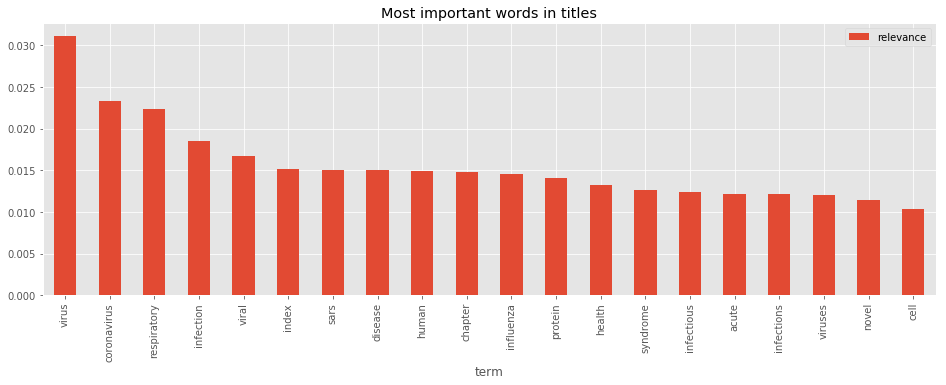

In [6]:
df_general = get_avg_importance(td,tfidf)
df_general.iloc[:20,].plot(kind='bar', title='Most important words in titles', figsize=(16,5))

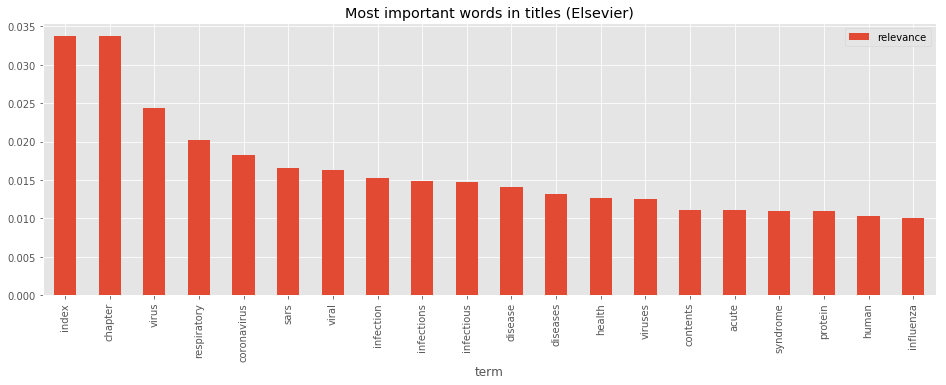

In [7]:
df_elsevier = get_avg_importance(td.tocsr()[np.where(df_allen.source_x=='Elsevier')[0],:],tfidf)
df_elsevier.iloc[:20,].plot(kind='bar', title='Most important words in titles (Elsevier)', figsize=(16,5))

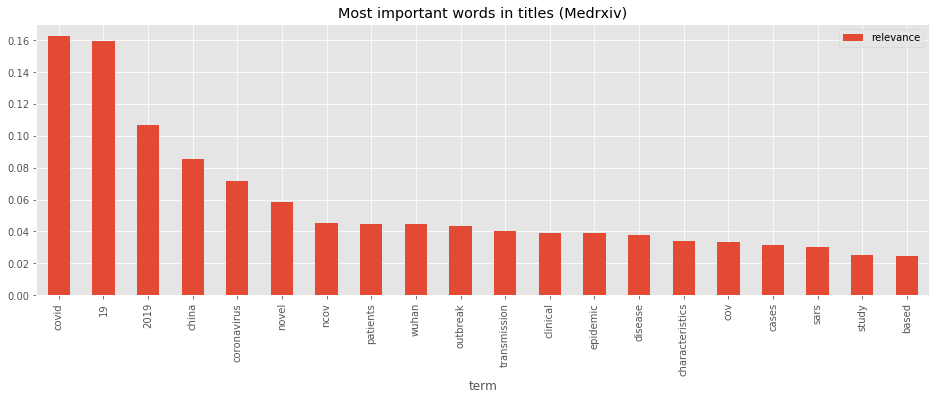

In [8]:
df_medrxiv = get_avg_importance(td.tocsr()[np.where(df_allen.source_x=='medrxiv')[0],:],tfidf)
df_medrxiv.iloc[:20,].plot(kind='bar', title='Most important words in titles (Medrxiv)', figsize=(16,5))

In [9]:
echo('In progress :-)')

('In progress :-)')


In [11]:
df_allen[df_allen.title.str.contains('index')]

,source_x,title,abstract,publish_time,journal,is_pr
40,Elsevier,Author index,,1991-12-31,British Veterinary Journal,True
41,Elsevier,Author and subject index,,1992-12-31,British Veterinary Journal,True
52,Elsevier,Cumulative subject index volumes 24–25,,1976-12-31,Experimental and Molecular Pathology,True
57,Elsevier,Cumulative subject index volumes 52–53,,1990-12-31,Experimental and Molecular Pathology,True
62,Elsevier,Master subject index,,1979-04-30,FEBS Letters,True
70,Elsevier,Author index to volume 282,,1991-05-06,FEBS Letters,True
78,Elsevier,Author index to volume 87,,1984-12-31,Gastroenterology,True
79,Elsevier,Subject index to volume 87,,1984-12-31,Gastroenterology,True
85,Elsevier,Cumulative index 1984–1988 volume 86 through v...,,1989-06-30,Gastroenterology,True
90,Elsevier,Subject index to volume 104,,1993-06-30,Gastroenterology,True
